<a href="https://colab.research.google.com/github/rzunick/MNA-Vision-Computacional-Equipo-18/blob/main/9_6_M%C3%A9todos_de_Segmentaci%C3%B3n_Super_Pixels_E18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión Computacional para Imágenes y Video**
Tecnológico de Monterrey

Dr. Gilberto Ochoa Ruiz

##**Semana 10: Métodos de Segmentación - Superpixels**


##**Equipo 18**
**Integrantes del equipo:** 
* Ronald David Zuniga - A01686240
* David Valles Canedo - A01191310
* Héctor Raúl Vázquez - A00565542
* Andrea Vázquez Tadeo - A01730613
* Miguel Angel Villanueva - A01793890

# **Sección 1: Ejercicio Conceptual**

## 1.1 Marco Conceptual

**Definición General:** Los superpíxeles son parches de imagen que agrupan píxeles con propiedades similares.

**Beneficios:**
1. Reducen la complejidad de las imágenes de miles de millones de píxeles a miles, cientos o menos de superpíxeles.
2. Permiten el agrupamiento de píxeles uniformes con propiedades similares que hace que cada superpíxel sea perceptivamente significativo. 
3. Conservan las estructuras de la imagen original. Permitiendo la aplicación de percepción humana para reconstruir formas de la imagen original sin conocerlas.

**Algoritmos**

Varios algoritmos de visión artificial utilizan superpíxeles para segmentar imágenes. Por lo general, los superpíxeles sobresegmentan las imágenes y, por lo tanto, se fusionan o borran mediante la evaluación de ciertos criterios.

Algunos criterios pueden ser un vector de características calculada a partir de los píxeles agrupados, paseos gráficos aleatorios o el tamaño de los superpíxeles.

1. **SLIC (Simple Linear Iterative Clustering):** divide la imagen en una cuadrícula de superpíxeles y los agrupa según el color y la proximidad.

2. **SEEDS (Superpixels Extracted via Energy-Driven Sampling):** refina una sobresegmentación inicial utilizando características locales de color y textura.

3. **LSC (Linear Spectral Clustering):** construye una representación gráfica de la imagen y la divide en subgráficos separados para obtener los superpíxeles.

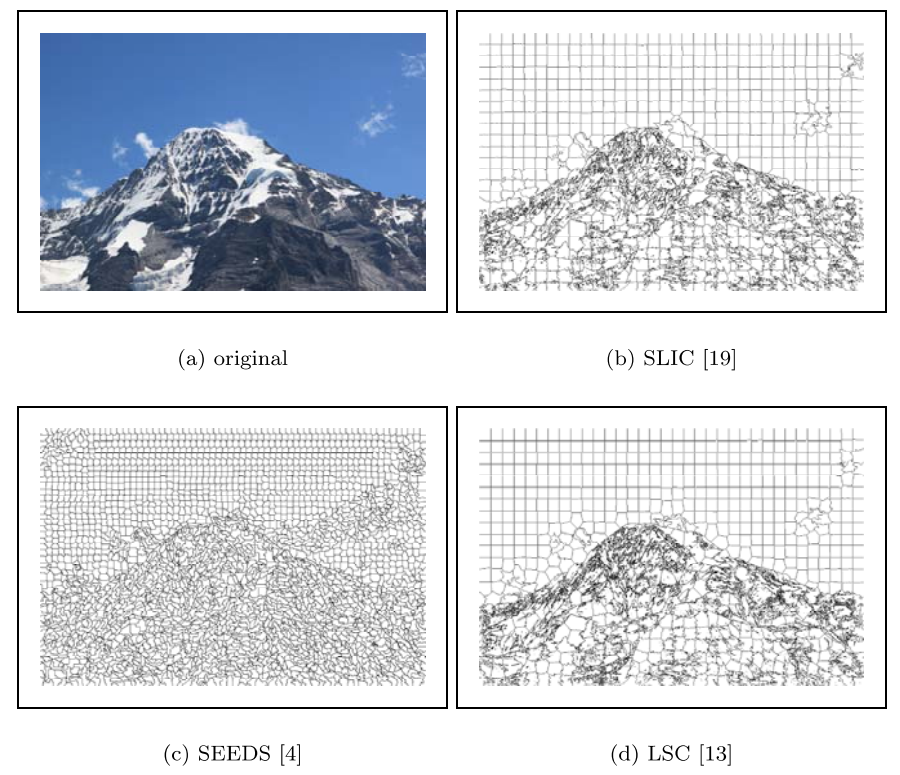

**Aplicación** 

Independientemente de la técnica elegida, los superpíxeles siempre tienden a  alinearse con los límites de la imagen y así conservar las estructuras de la imagen original. Esta propiedad también influye en la forma del superpíxel.

La aplicación de superpíxeles sobresegmentan imágenes mientras conservan las estructuras de la imagen. Esta es la razón por la que estos enfoques se utilizan a menudo como preprocesamiento para más algoritmos de segmentación de imágenes. 

Sin embargo, estos enfoques se basan en diferentes conjuntos de características. Por lo tanto el procesamiento posterior de la imagen depende en gran medida del algoritmo de superpíxel elegido.

## 1.2 Ejercicio

Importar librerias

In [3]:
from skimage.segmentation import slic #SLIC (Simple Linear Iterative Clustering)
from skimage.segmentation import quickshift #SEEDS (Superpixels Extracted via Energy-Driven Sampling)
from skimage.segmentation import felzenszwalb #LSC (Linear Spectral Clustering)
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

import numpy as np
import cv2 

from skimage import io
import matplotlib.pyplot as plt

In [4]:
#Código para importar carpeta de imágenes en Git-Hub
!git clone https://github.com/rzunick/MNA-Vision-Computacional-Equipo-18.git

# Modificar las rutas locales incluyendo: /content/MNA-Vision-Computacional-Equipo-18/

fatal: destination path 'MNA-Vision-Computacional-Equipo-18' already exists and is not an empty directory.


Importar imagenes

In [8]:
# Importar rutas de imágenes para ejercicio
path1 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu1.jpg"
path2 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu2.jpg"
path3 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu3.jpg"
path4 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu4.jpg"
path5 = "/content/MNA-Vision-Computacional-Equipo-18/data/grogu5.jpg"

# Cargar imágenes 
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
img3 = cv2.imread(path3)
img4 = cv2.imread(path4)
img5 = cv2.imread(path5)

In [16]:
# Cargar imágenes en RGB
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)
img5 = cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)

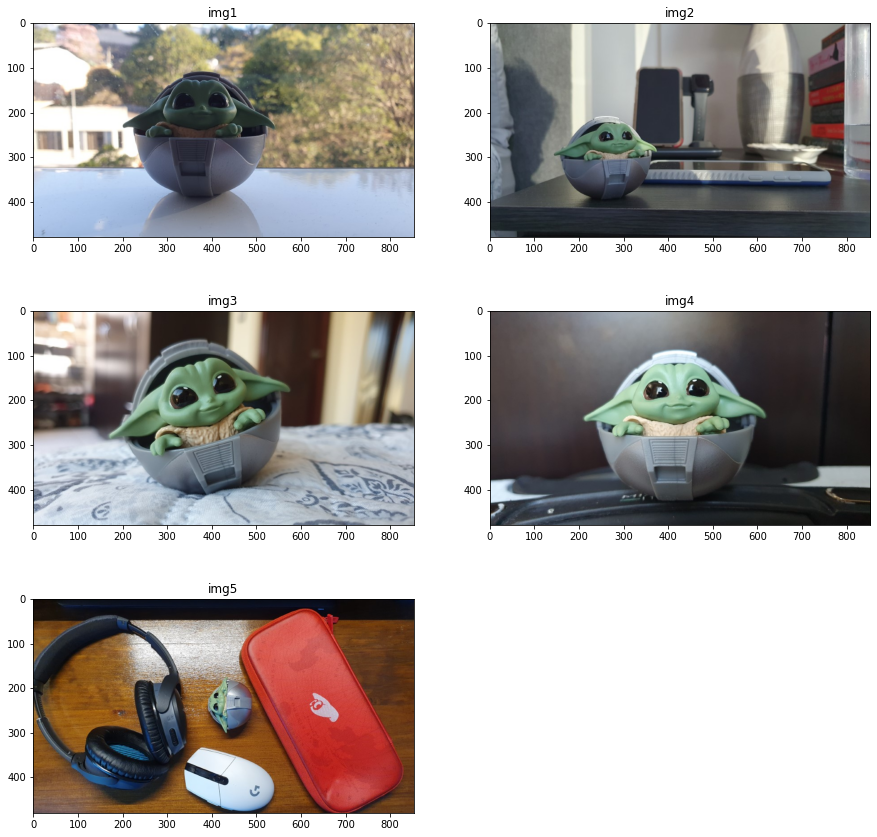

In [18]:
# Mostrar imágenes importadas
images = [img1, img2, img3, img4, img5]
plt.figure(figsize=(15, 15))

for i, img in enumerate(images):
    plt.subplot(3, 2, i+1)
    plt.imshow(img)
    plt.title("img{}".format(i+1))

Definición de algoritmos

In [ ]:
# Apply SLIC algorithm
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)

# Apply SEEDS algorithm
segments_seeds = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)

# Apply LSC algorithm
segments_lsc = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)

# Display the results
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].imshow(mark_boundaries(img, segments_slic))
ax[0, 0].set_title('SLIC')

ax[0, 1].imshow(mark_boundaries(img, segments_seeds))
ax[0, 1].set_title('SEEDS')

ax[1, 0].imshow(mark_boundaries(img, segments_lsc))
ax[1, 0].set_title('LSC')

ax[1, 1].imshow(img)
ax[1, 1].set_title('Original')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

# **Sección 2: Ejercicio de Aplicación**

# **Referencias**

1. Gerhard Klassen. Shape Based Outlier Detection in SLIC Superpixels (2023). Retrieved 16 March 2023, from https://ceur-ws.org/Vol-1858/paper12.pdf

2. Zhengqin Li. Superpixel Segmentation using Linear Spectral Clustering (2023). Retrieved 16 March 2023, from https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Li_Superpixel_Segmentation_Using_2015_CVPR_paper.pdf

3. Comparison of segmentation and superpixel algorithms — skimage v0.20.0 docs. (2023). Retrieved 16 March 2023, from https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_segmentations.html

4. OpenCV: Superpixels. (2023). Retrieved 16 March 2023, from https://docs.opencv.org/4.x/df/d6c/group__ximgproc__superpixel.html

5. OpenCV: cv::ximgproc::SuperpixelSLIC Class Reference. (2023). Retrieved 16 March 2023, from https://docs.opencv.org/4.x/d3/da9/classcv_1_1ximgproc_1_1SuperpixelSLIC.html

6. OpenCV: cv::ximgproc::SuperpixelLSC Class Reference. (2023). Retrieved 16 March 2023, from https://docs.opencv.org/4.x/d5/da0/classcv_1_1ximgproc_1_1SuperpixelLSC.html

7. OpenCV: cv::ximgproc::SuperpixelSEEDS Class Reference. (2023). Retrieved 16 March 2023, from https://docs.opencv.org/4.x/df/d81/classcv_1_1ximgproc_1_1SuperpixelSEEDS.html